### Ibad Ur Rahman
### 23MDBCS421
### Data Science
### Semester 5th
### Lab Task 9
### Dr.Tariq Sadad

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Load the Dataset

In [ ]:
df = pd.read_csv("Mall_Customers.csv")

# Display basic info
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Rename columns for easier access

In [ ]:
df = df.rename(columns={
    "Annual Income (k$)": "Annual_Income",
    "Spending Score (1-100)": "Spending_Score"
})

# Display the first few rows after renaming
df.head()


,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Encode categorical 'Gender' and drop 'CustomerID'

In [ ]:
le = LabelEncoder()
# encode existing categorical column (handle both possible names)
if "Gender" in df.columns:
    df["Gender"] = le.fit_transform(df["Gender"])
elif "Genre" in df.columns:
    df["Genre"] = le.fit_transform(df["Genre"])
else:
    raise KeyError("No 'Gender' or 'Genre' column found in df")

# Drop the CustomerID column as it doesn't help in prediction
df = df.drop(columns=["CustomerID"])

df.head()


,Genre,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Create Target (1 = High Spender, 0 = Low Spender)

In [ ]:
df["HighSpender"] = np.where(df["Spending_Score"] >= 50, 1, 0)

# Define Features (X) and Target (y)
X = df.drop(columns=["Spending_Score", "HighSpender"])
y = df["HighSpender"]

df.head()


,Genre,Age,Annual_Income,Spending_Score,HighSpender
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0


Split data into Train and Test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (160, 3)
Test set: (40, 3)


Standardize (scale) features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train baseline Random Forest model before PCA

In [ ]:
rf = RandomForestClassifier(random_state=42, n_estimators=120, max_depth=6)
rf.fit(X_train_scaled, y_train)

# Predictions and accuracy
y_pred = rf.predict(X_test_scaled)
acc_before = accuracy_score(y_test, y_pred) * 100

print("Accuracy BEFORE PCA:", round(acc_before, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy BEFORE PCA: 65.0 %

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        20
           1       0.67      0.60      0.63        20

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



Apply PCA to reduce dimensions

Explained Variance Ratio: [0.37078893 0.32543351]


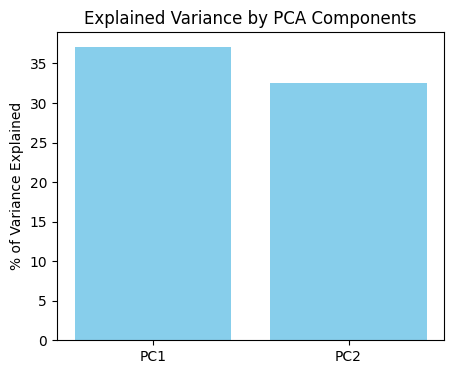

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot variance contribution of each component
plt.figure(figsize=(5,4))
plt.bar(["PC1", "PC2"], pca.explained_variance_ratio_ * 100, color='skyblue')
plt.title("Explained Variance by PCA Components")
plt.ylabel("% of Variance Explained")
plt.show()


Train Random Forest model on PCA-reduced data

In [ ]:
rf_pca = RandomForestClassifier(random_state=42, n_estimators=120, max_depth=6)
rf_pca.fit(X_train_pca, y_train)

# Predictions after PCA
y_pred_pca = rf_pca.predict(X_test_pca)
acc_after = accuracy_score(y_test, y_pred_pca) * 100

print("Accuracy AFTER PCA:", round(acc_after, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))


Accuracy AFTER PCA: 67.5 %

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.65      0.75      0.70        20

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40



Compare accuracy before and after PCA visually

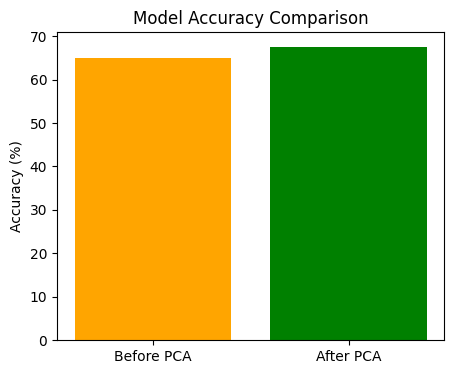

In [ ]:
plt.figure(figsize=(5,4))
plt.bar(["Before PCA", "After PCA"], [acc_before, acc_after], color=['orange','green'])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.show()


Confusion Matrix for PCA Model

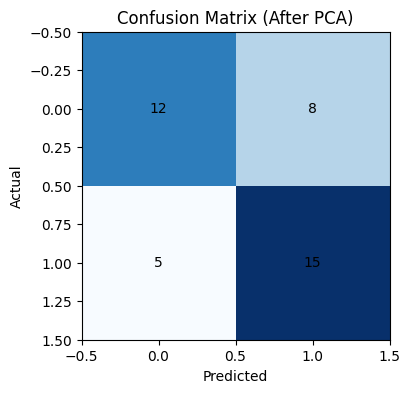

In [ ]:
cm = confusion_matrix(y_test, y_pred_pca)

plt.figure(figsize=(4,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix (After PCA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Annotate cells
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()


Visualize PCA clusters (High vs Low Spenders)

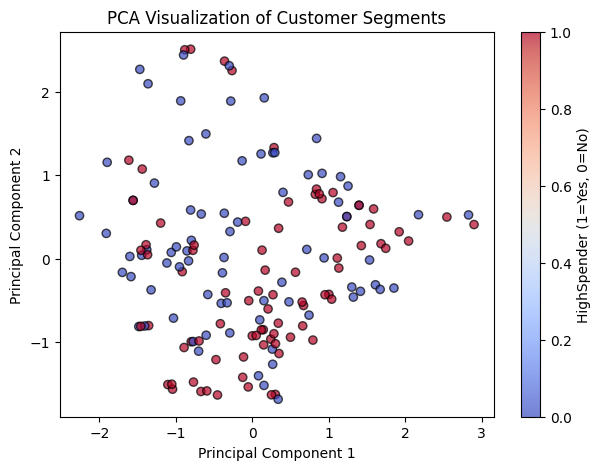

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Customer Segments")
plt.colorbar(label="HighSpender (1=Yes, 0=No)")
plt.show()
